In [1]:
import numpy as np
import pathpy as pp
import math
import seaborn as sns

## Examples of networks with varying degree assortativities

In [5]:
negative_degree_assortitivity = pp.Network(directed=False)
negative_degree_assortitivity.add_edge(("a", "b"))
negative_degree_assortitivity.add_edge(("b", "c"))

neutral_degree_assortitivity = pp.Network(directed=False)
neutral_degree_assortitivity.add_edge(("10", "5"))
neutral_degree_assortitivity.add_edge(("5", "8"))
neutral_degree_assortitivity.add_edge(("8", "6"))
neutral_degree_assortitivity.add_edge(("6", "10"))
neutral_degree_assortitivity.add_edge(("5", "0"))
neutral_degree_assortitivity.add_edge(("0", "8"))
neutral_degree_assortitivity.add_edge(("6", "7"))
neutral_degree_assortitivity.add_edge(("7", "1"))


positive_degree_assortitivity = pp.Network(directed=False)
# Central Clique
positive_degree_assortitivity.add_edge(("a", "b"))
positive_degree_assortitivity.add_edge(("a", "c"))
positive_degree_assortitivity.add_edge(("b", "d"))
positive_degree_assortitivity.add_edge(("c", "d"))
positive_degree_assortitivity.add_edge(("b", "c"))
positive_degree_assortitivity.add_edge(("a", "d"))
# Rim
positive_degree_assortitivity.add_edge(("a", "e"))
positive_degree_assortitivity.add_edge(("e", "f"))
positive_degree_assortitivity.add_edge(("f", "g"))

In [6]:
print(f"Negative degree assortativity: {pp.statistics.degree_assortativity(negative_degree_assortitivity)}")
print(f"Neutral degree assortativity: {pp.statistics.degree_assortativity(neutral_degree_assortitivity)}")
print(f"Positive degree assortativity: {pp.statistics.degree_assortativity(positive_degree_assortitivity)}")

Negative degree assortativity: -1.0
Neutral degree assortativity: 0.0
Positive degree assortativity: 0.32075471698113234


## Analysis of a real-life network using random graph ensembles

In [12]:
n_highschool = pp.io.sql.read_network('../data/networks.db', sql='SELECT source, target FROM highschool', directed=False)

[11-22 12:49:23: WARNING] The edge (21,15) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[11-22 12:49:23: WARNING] The edge (48,45) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[11-22 12:49:23: WARNING] The edge (79,45) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[11-22 12:49:23: WARNING] The edge (119,101) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[11-22 12:49:23: WARNING] The edge (120,89) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[11-22 12:49:23: WARNING] The edge (122,119) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[11-22 12:49:23: WARNING] The edge (134,87) exist already and will not be considered. To capture this

In [36]:
num_nodes = n_highschool.number_of_nodes()
num_edges = n_highschool.number_of_edges()
num_possible_edges = (num_nodes**2 - num_nodes) / 2
edge_probability = num_edges / num_possible_edges

0.04873949579831933


In [31]:
num_microstates = 100
microstates = [pp.generators.ER_np(n=num_nodes, p=edge_probability) for _ in range(num_microstates)]

In [32]:
degree_assortativities = list(map(lambda x: x.degree_assortativity(), microstates))

/home/johannes/.cache/pypoetry/virtualenvs/notebooks-vYfm2GMt-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

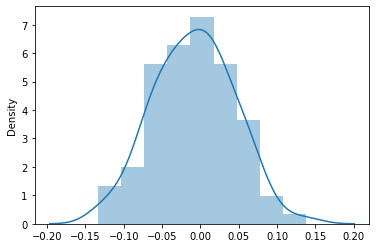

In [33]:
sns.distplot(degree_assortativities)